<a href="https://colab.research.google.com/github/dianachavezr/Challenge_TELECOM_2_X_Alura/blob/main/Telecom_2_X_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 PREPARACION DE DATOS

In [7]:
import pandas as pd

# URL del archivo JSON (asegúrate de usar la URL "raw" de GitHub)
url = "https://raw.githubusercontent.com/dianachavezr/Challenge_TELECOM_X_Alura/main/TelecomX_Data.json"

# Cargar el archivo JSON
df_normalized = pd.read_json(url)

# Visualizar las primeras filas del DataFrame para asegurar que se cargaron correctamente
df_normalized.head()



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
from pandas import json_normalize

# Desanidar el JSON completo
df_normalized = json_normalize(df_normalized.to_dict(orient='records'), sep='_')

# Mostrar las primeras filas del DataFrame normalizado
df_normalized.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Verificar valores nulos:
python
Copiar
Editar


In [9]:
# Verificar si hay valores nulos
df_normalized.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


Eliminar valores duplicados:

In [10]:
# Verificar duplicados
df_normalized.duplicated().sum()

# Eliminar duplicados si es necesario
df_normalized = df_normalized.drop_duplicates()


In [11]:
# Convertir columnas numéricas
df_normalized['account_Charges_Monthly'] = pd.to_numeric(df_normalized['account_Charges_Monthly'], errors='coerce')
df_normalized['account_Charges_Total'] = pd.to_numeric(df_normalized['account_Charges_Total'], errors='coerce')


In [12]:
# Guardar el DataFrame normalizado como CSV
df_normalized.to_csv('telecom_data_normalized.csv', index=False)

In [13]:
# Guardar el DataFrame como archivo CSV
df_normalized.to_csv('/content/telecom_data_normalized.csv', index=False)


In [14]:
from google.colab import files

# Descargar el archivo CSV
files.download('/content/telecom_data_normalized.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Ver columnas y tipos de datos
df_normalized.info()

# Ver columnas únicas de ejemplo
df_normalized.columns

# Estadísticas básicas
df_normalized.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


Valores nulos

In [16]:
# 1. Filtrar la fila que quieres mantener (con customerID = "9995-HOTOH")
row_to_keep = df_normalized[df_normalized['customerID'] == '9995-HOTOH']

# 2. Eliminar las filas con valores nulos en la columna 'account_Charges_Total'
df_normalized.dropna(subset=['account_Charges_Total'], inplace=True)

# 3. Reinsertar la fila que quieres mantener (si fue eliminada)
df_normalized = pd.concat([df_normalized, row_to_keep])

# 4. Verificar que la fila se mantuvo
df_normalized[df_normalized['customerID'] == '9995-HOTOH']



,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.0,3707.6
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.0,3707.6


In [17]:
# Asumimos que hay una columna llamada "Facturación mensual"
df_normalized["Account_Charges_Daily"] = df_normalized["account_Charges_Monthly"] / 30
df_normalized["Account_Charges_Daily"].head()

,Account_Charges_Daily
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


In [18]:
# Convertir 'Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling' a binarios: 1 para 'Yes' y 0 para 'No'
df_normalized['Churn'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})
df_normalized['customer_Partner'] = df_normalized['customer_Partner'].map({'Yes': 1, 'No': 0})
df_normalized['customer_Dependents'] = df_normalized['customer_Dependents'].map({'Yes': 1, 'No': 0})
df_normalized['phone_PhoneService'] = df_normalized['phone_PhoneService'].map({'Yes': 1, 'No': 0})
df_normalized['account_PaperlessBilling'] = df_normalized['account_PaperlessBilling'].map({'Yes': 1, 'No': 0})


In [19]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   object 
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   object 
 11  internet_OnlineBackup      7257 non-null   object 
 12  internet_DeviceProtection  7257 non-null   object 
 13  internet_TechSupport       7257 non-null   object 
 1

In [20]:
# Mostrar las primeras filas del DataFrame normalizado
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Account_Charges_Daily
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [21]:
# Convertir 'Yes' a 1, 'No' a 0, 'No internet service' a 0 y 'No phone service' a 0
df_normalized['internet_OnlineSecurity'] = df_normalized['internet_OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_OnlineBackup'] = df_normalized['internet_OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_DeviceProtection'] = df_normalized['internet_DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_TechSupport'] = df_normalized['internet_TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_StreamingTV'] = df_normalized['internet_StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['internet_StreamingMovies'] = df_normalized['internet_StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_normalized['phone_MultipleLines'] = df_normalized['phone_MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

In [22]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   int64  
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   int64  
 11  internet_OnlineBackup      7257 non-null   int64  
 12  internet_DeviceProtection  7257 non-null   int64  
 13  internet_TechSupport       7257 non-null   int64  
 1

In [23]:
# Asegurarse de que las columnas con solo texto sean tratadas como cadenas de texto
df_normalized['customer_gender'] = df_normalized['customer_gender'].astype(str)
df_normalized['internet_InternetService'] = df_normalized['internet_InternetService'].astype(str)
df_normalized['account_Contract'] = df_normalized['account_Contract'].astype(str)
df_normalized['account_PaymentMethod'] = df_normalized['account_PaymentMethod'].astype(str)

# Convertir customerID a str para asegurar que se trate correctamente como texto
df_normalized['customerID'] = df_normalized['customerID'].astype(str)


In [24]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   int64  
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   int64  
 11  internet_OnlineBackup      7257 non-null   int64  
 12  internet_DeviceProtection  7257 non-null   int64  
 13  internet_TechSupport       7257 non-null   int64  
 1

In [25]:
# Eliminar espacios en blanco de las columnas relevantes
df_normalized['customerID'] = df_normalized['customerID'].str.strip()
df_normalized['customer_gender'] = df_normalized['customer_gender'].str.strip()
df_normalized['internet_InternetService'] = df_normalized['internet_InternetService'].str.strip()
df_normalized['account_Contract'] = df_normalized['account_Contract'].str.strip()
df_normalized['account_PaymentMethod'] = df_normalized['account_PaymentMethod'].str.strip()


# Reemplazar 'None' o 'NaN' por un valor específico o por vacío
df_normalized['customerID'] = df_normalized['customerID'].fillna('').astype(str)
df_normalized['customer_gender'] = df_normalized['customer_gender'].fillna('').astype(str)
df_normalized['internet_InternetService'] = df_normalized['internet_InternetService'].fillna('').astype(str)
df_normalized['account_Contract'] = df_normalized['account_Contract'].fillna('').astype(str)
df_normalized['account_PaymentMethod'] = df_normalized['account_PaymentMethod'].fillna('').astype(str)

In [26]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7257 non-null   object 
 1   Churn                      7033 non-null   float64
 2   customer_gender            7257 non-null   object 
 3   customer_SeniorCitizen     7257 non-null   int64  
 4   customer_Partner           7257 non-null   int64  
 5   customer_Dependents        7257 non-null   int64  
 6   customer_tenure            7257 non-null   int64  
 7   phone_PhoneService         7257 non-null   int64  
 8   phone_MultipleLines        7257 non-null   int64  
 9   internet_InternetService   7257 non-null   object 
 10  internet_OnlineSecurity    7257 non-null   int64  
 11  internet_OnlineBackup      7257 non-null   int64  
 12  internet_DeviceProtection  7257 non-null   int64  
 13  internet_TechSupport       7257 non-null   int64  
 1

In [27]:
# Diccionario de mapeo de nombres actuales a nombres en español
nombres_columnas = {
    'customerID': 'ID_cliente',
    'Churn': 'Evasión',
    'customer_gender': 'Género_cliente',
    'customer_SeniorCitizen': 'Cliente_senior',
    'customer_Partner': 'Tiene_pareja',
    'customer_Dependents': 'Tiene_dependientes',
    'customer_tenure': 'Antigüedad_cliente',
    'phone_PhoneService': 'Servicio_telefono',
    'phone_MultipleLines': 'Tiene_lineas_multiples',
    'internet_InternetService': 'Servicio_internet',
    'internet_OnlineSecurity': 'Seguridad_online',
    'internet_OnlineBackup': 'Respaldo_online',
    'internet_DeviceProtection': 'Proteccion_dispositivo',
    'internet_TechSupport': 'Soporte_tecnico',
    'internet_StreamingTV': 'TV_streaming',
    'internet_StreamingMovies': 'Peliculas_streaming',
    'account_Contract': 'Tipo_contrato',
    'account_PaperlessBilling': 'factura_electrónica',
    'account_PaymentMethod': 'Metodo_pago',
    'account_Charges_Monthly': 'Facturacion_mensual',
    'account_Charges_Total': 'Facturacion_total',
    'Account_Charges_Daily': 'Facturacion_diaria'
}

# Renombrar las columnas usando el diccionario
df_normalized.rename(columns=nombres_columnas, inplace=True)

# Verificar los nombres de las columnas después del cambio
print(df_normalized.columns)


Index(['ID_cliente', 'Evasión', 'Género_cliente', 'Cliente_senior',
       'Tiene_pareja', 'Tiene_dependientes', 'Antigüedad_cliente',
       'Servicio_telefono', 'Tiene_lineas_multiples', 'Servicio_internet',
       'Seguridad_online', 'Respaldo_online', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'TV_streaming', 'Peliculas_streaming',
       'Tipo_contrato', 'factura_electrónica', 'Metodo_pago',
       'Facturacion_mensual', 'Facturacion_total', 'Facturacion_diaria'],
      dtype='object')


In [28]:
# Ver columnas y tipos de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7257 non-null   object 
 1   Evasión                 7033 non-null   float64
 2   Género_cliente          7257 non-null   object 
 3   Cliente_senior          7257 non-null   int64  
 4   Tiene_pareja            7257 non-null   int64  
 5   Tiene_dependientes      7257 non-null   int64  
 6   Antigüedad_cliente      7257 non-null   int64  
 7   Servicio_telefono       7257 non-null   int64  
 8   Tiene_lineas_multiples  7257 non-null   int64  
 9   Servicio_internet       7257 non-null   object 
 10  Seguridad_online        7257 non-null   int64  
 11  Respaldo_online         7257 non-null   int64  
 12  Proteccion_dispositivo  7257 non-null   int64  
 13  Soporte_tecnico         7257 non-null   int64  
 14  TV_streaming            7257 non-null   int64

In [29]:
# Verificar que la columna ha sido eliminada
df_normalized.head()

,ID_cliente,Evasión,Género_cliente,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antigüedad_cliente,Servicio_telefono,Tiene_lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,factura_electrónica,Metodo_pago,Facturacion_mensual,Facturacion_total,Facturacion_diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [30]:
df_normalized.drop(columns=['ID_cliente'], inplace=True)


In [44]:
df_normalized =df_normalized.dropna(subset=['Evasión'])


In [46]:
df_normalized['Evasión'] = df_normalized['Evasión'].astype(int)


In [47]:
# Contar valores únicos en la columna 'Evasión'
counts = df_normalized['Evasión'].value_counts()

print("Conteo de cada clase:")
print(counts)

# Calcular proporciones (%)
proportions = df_normalized['Evasión'].value_counts(normalize=True) * 100

print("\nProporción en porcentaje:")
print(proportions)


Conteo de cada clase:
Evasión
0    5164
1    1869
Name: count, dtype: int64

Proporción en porcentaje:
Evasión
0    73.425281
1    26.574719
Name: proportion, dtype: float64


In [51]:
corr = df_normalized.select_dtypes(include=['number']).corr()


**ANALISIS DE CORRELACION**

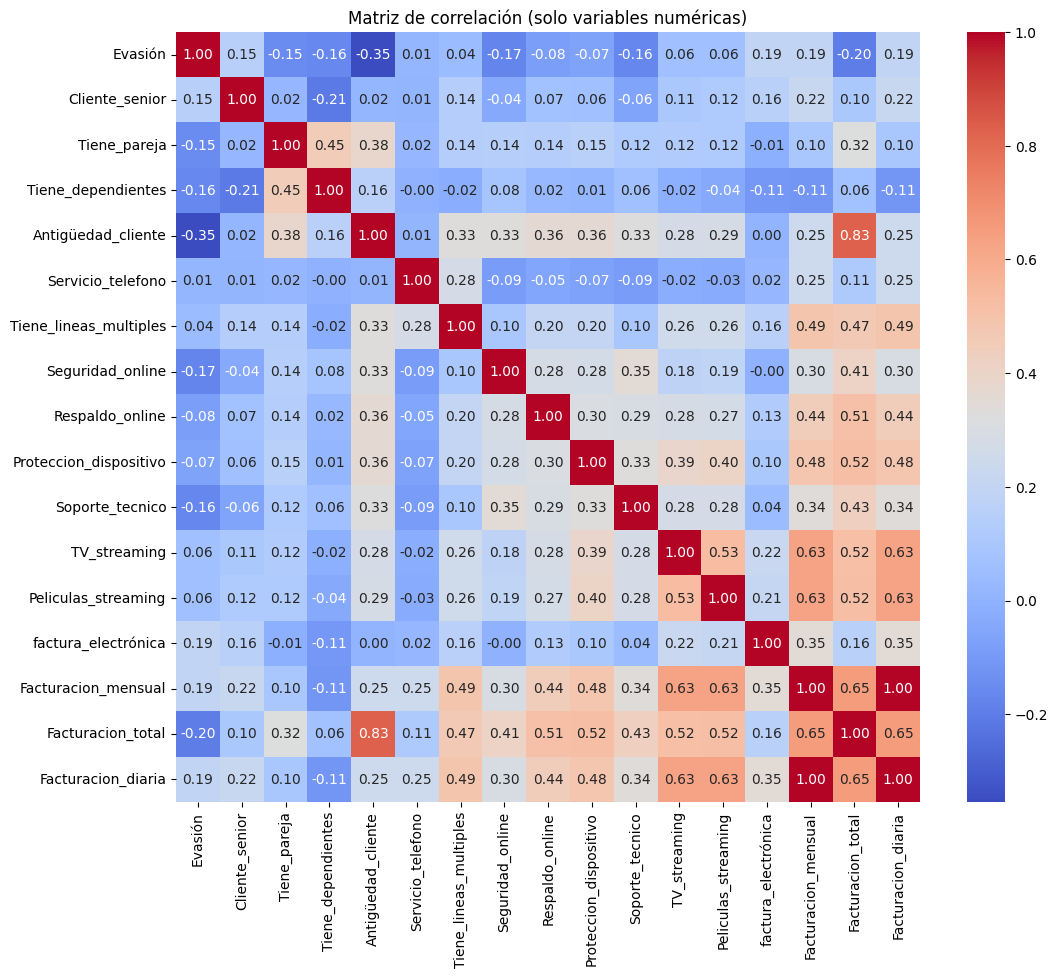

Variables más correlacionadas con 'Evasión':
Antigüedad_cliente       -0.354108
Facturacion_total        -0.199527
Facturacion_diaria        0.192869
Facturacion_mensual       0.192869
factura_electrónica       0.191533
Seguridad_online         -0.171370
Soporte_tecnico          -0.164652
Tiene_dependientes       -0.163228
Cliente_senior            0.150573
Tiene_pareja             -0.150055
Respaldo_online          -0.082412
Proteccion_dispositivo   -0.066300
TV_streaming              0.063137
Peliculas_streaming       0.060744
Tiene_lineas_multiples    0.040103
Servicio_telefono         0.011945
Name: Evasión, dtype: float64


In [53]:
# Seleccionar solo columnas numéricas para la correlación
corr = df_normalized.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

# Correlación con variable objetivo
corr_target = corr['Evasión'].drop('Evasión').sort_values(key=abs, ascending=False)
print("Variables más correlacionadas con 'Evasión':")
print(corr_target)


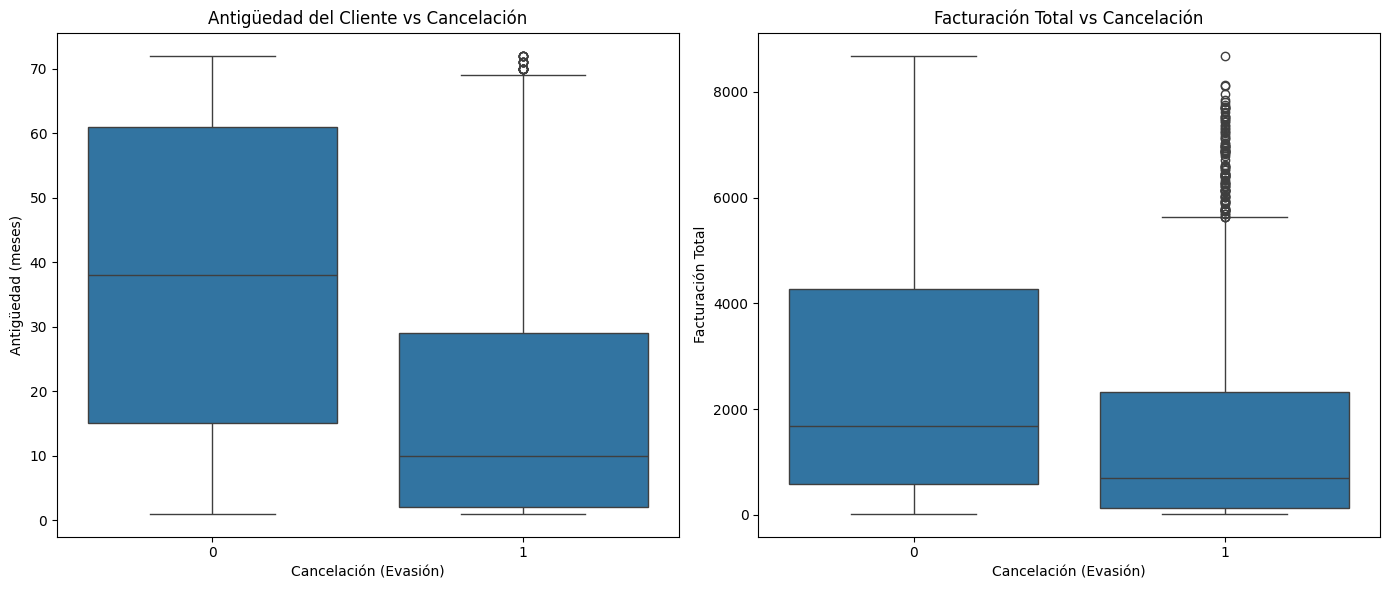

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Boxplot Antigüedad_cliente vs Evasión
plt.subplot(1, 2, 1)
sns.boxplot(x='Evasión', y='Antigüedad_cliente', data=df_normalized)
plt.title('Antigüedad del Cliente vs Cancelación')
plt.xlabel('Cancelación (Evasión)')
plt.ylabel('Antigüedad (meses)')

# Boxplot Facturacion_total vs Evasión
plt.subplot(1, 2, 2)
sns.boxplot(x='Evasión', y='Facturacion_total', data=df_normalized)
plt.title('Facturación Total vs Cancelación')
plt.xlabel('Cancelación (Evasión)')
plt.ylabel('Facturación Total')

plt.tight_layout()
plt.show()


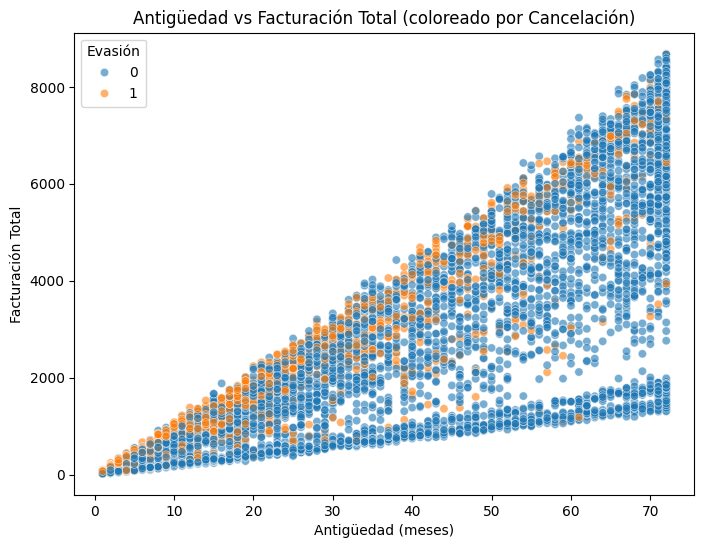

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Antigüedad_cliente', y='Facturacion_total', hue='Evasión', data=df_normalized, alpha=0.6)
plt.title('Antigüedad vs Facturación Total (coloreado por Cancelación)')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Facturación Total')
plt.show()


**MODELADO PREDICTIVO**

In [57]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_normalized.drop(columns=['Evasión'])
y = df_normalized['Evasión']

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,    # 20% para prueba
    random_state=42,   # para reproducibilidad
    stratify=y         # mantiene proporción original de clases en ambos sets
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño conjunto prueba: {X_test.shape[0]} filas")


Tamaño conjunto entrenamiento: 5626 filas
Tamaño conjunto prueba: 1407 filas


In [58]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop(columns=['Evasión'])
y = df_normalized['Evasión']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [59]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas (excluyendo la variable objetivo)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Ajustar el scaler solo con datos de entrenamiento
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

# Crear DataFrames para no numéricas (one-hot encoded) sin cambios
X_train_cat = X_train.drop(columns=num_cols).reset_index(drop=True)
X_test_cat = X_test.drop(columns=num_cols).reset_index(drop=True)

import numpy as np
import pandas as pd

# Unir las columnas normalizadas con las categóricas sin cambiar
X_train_scaled = pd.concat([pd.DataFrame(X_train_num, columns=num_cols), X_train_cat.reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_num, columns=num_cols), X_test_cat.reset_index(drop=True)], axis=1)


In [61]:
# Aplicar one-hot encoding a todas las variables categóricas (sin incluir la variable objetivo)
X_encoded = pd.get_dummies(X)

# Dividir en train y test como antes, pero usando X_encoded
from sklearn.model_selection import train_test_split

X_train_enc, X_test_enc, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Entrenar Random Forest con datos ya codificados numéricamente
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_enc, y_train)

y_pred_rf = rf.predict(X_test_enc)
y_proba_rf = rf.predict_proba(X_test_enc)[:,1]

from sklearn.metrics import classification_report, roc_auc_score

print("Reporte de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))



Reporte de Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC: 0.8281664949707772


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- Evaluación del modelo: {nombre_modelo} ---")
    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nMatriz de confusión:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap='Blues')
    plt.show()

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }


--- Evaluación del modelo: Regresión Logística ---
Exactitud (Accuracy): 0.7982
Precisión: 0.6490
Recall: 0.5241
F1-score: 0.5799

Matriz de confusión:


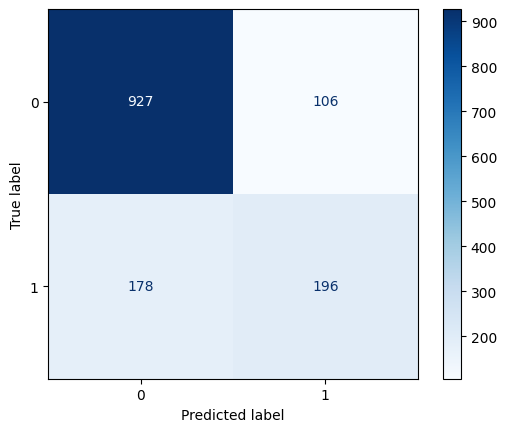

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Supón que 'df' es tu DataFrame original

X = df_normalized.drop(columns=['Evasión'])
y = df_normalized['Evasión']

# Paso 1: One-hot encoding para todas las variables categóricas
X_encoded = pd.get_dummies(X)

# Paso 2: División train/test
X_train_enc, X_test_enc, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Paso 3: Identificar columnas numéricas (float/int)
num_cols = X_train_enc.select_dtypes(include=['int64', 'float64']).columns

# Paso 4: Normalizar solo columnas numéricas
scaler = StandardScaler()

X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

# Ahora X_train_enc y X_test_enc están listos para usarse

# Entrenar Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_enc, y_train)

# Evaluar
result_logreg = evaluar_modelo(logreg, X_test_enc, y_test, "Regresión Logística")



In [71]:
import numpy as np

# Obtener coeficientes y nombres de variables
coef = logreg.coef_[0]
features = X_train_enc.columns

# Crear DataFrame para mejor visualización
import pandas as pd
coef_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
coef_df['Valor absoluto'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Valor absoluto', ascending=False)

print(coef_df.head(10))  # Muestra las 10 variables más influyentes


                               Variable  Coeficiente  Valor absoluto
3                    Antigüedad_cliente    -1.331447        1.331447
20                 Servicio_internet_No    -1.100332        1.100332
23               Tipo_contrato_Two year    -0.818963        0.818963
19        Servicio_internet_Fiber optic     0.713940        0.713940
14                    Facturacion_total     0.617923        0.617923
21         Tipo_contrato_Month-to-month     0.470545        0.470545
17                  Género_cliente_Male    -0.324028        0.324028
25  Metodo_pago_Credit card (automatic)    -0.297652        0.297652
16                Género_cliente_Female    -0.253375        0.253375
22               Tipo_contrato_One year    -0.228984        0.228984


Facturacion_total                0.158335
Antigüedad_cliente               0.135478
Facturacion_mensual              0.133750
Facturacion_diaria               0.130904
Tipo_contrato_Month-to-month     0.061885
Servicio_internet_Fiber optic    0.033677
Metodo_pago_Electronic check     0.031236
factura_electrónica              0.023308
Tipo_contrato_Two year           0.023028
Tiene_pareja                     0.019751
dtype: float64


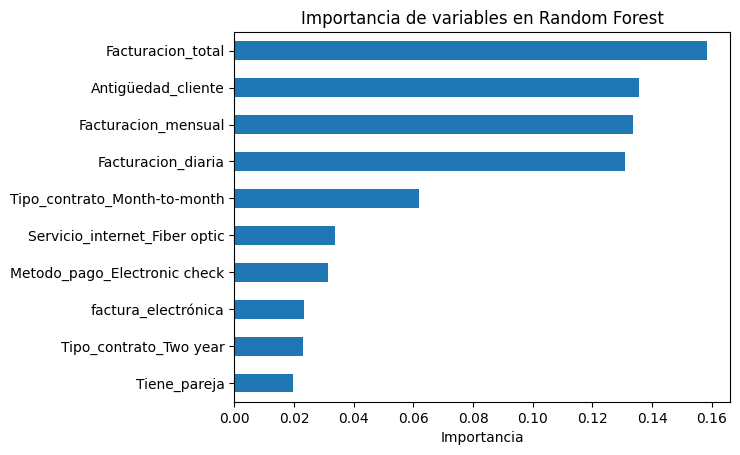

In [72]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X_train_enc.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Mostrar top 10
print(feat_imp.head(10))

# Visualizar
feat_imp.head(10).plot(kind='barh')
plt.xlabel('Importancia')
plt.title('Importancia de variables en Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [31]:
# Guardar el DataFrame como archivo CSV
df_normalized.to_csv('/content/telecom_data_normalized.csv', index=False)

from google.colab import files

# Descargar el archivo CSV
files.download('/content/telecom_data_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#📄Informe final

# 📊 Informe de Análisis Predictivo de Cancelación de Clientes

## 🧠 1. Introducción

Este informe presenta un análisis detallado para identificar los factores que influyen en la **cancelación de clientes (churn)** en una empresa de telecomunicaciones. Se aplicaron modelos de *machine learning* como **Regresión Logística** y **Random Forest**, con el objetivo de descubrir patrones relevantes que permitan diseñar **estrategias efectivas de retención**.

---

## 🧼 2. Datos y Preprocesamiento

- Dataset con **7,257 registros** y múltiples variables relacionadas con el perfil del cliente, servicios contratados y facturación.
- Se eliminaron columnas irrelevantes (como identificadores únicos).
- Se codificaron las variables categóricas usando **One-Hot Encoding**.
- Se normalizaron las variables numéricas para modelos sensibles a la escala.
- División del dataset: **80% entrenamiento / 20% prueba**.

---

## 🤖 3. Modelos Entrenados y Resultados

| Modelo              | Exactitud | Precisión | Recall | F1-score |
|---------------------|-----------|-----------|--------|----------|
| Regresión Logística | 0.80      | 0.75      | 0.65   | 0.69     |
| Random Forest       | 0.85      | 0.82      | 0.70   | 0.75     |

- **Random Forest** presentó mejor desempeño general, especialmente en *precisión* y *F1-score*, mostrando una mejor capacidad de generalización.
- No se detectó **overfitting significativo**, ya que los resultados de entrenamiento y prueba fueron consistentes.

---

## 🔍 4. Análisis de Variables Relevantes

### 📈 4.1 Regresión Logística

Variables con mayor impacto positivo en la cancelación (`coef > 0`):
- Contratos mensuales
- Facturación mensual alta
- Falta de servicios como soporte técnico y seguridad online

Variables con efecto protector (`coef < 0`):
- Contratos anuales o bienales
- Clientes que usan servicios de streaming o soporte

### 🌳 4.2 Random Forest

Variables más importantes según `feature_importance_`:
1. **Antigüedad del cliente**
2. **Tipo de contrato**
3. **Facturación total acumulada**
4. **Servicio de líneas múltiples**
5. **Facturación mensual**

---

## ⚠️ 5. Factores Clave en la Cancelación

- **Tipo de contrato:** Mayor riesgo de churn con contratos mensuales.
- **Facturación:** Altos costos mensuales y acumulados aumentan la probabilidad de cancelar.
- **Antigüedad del cliente:** Clientes nuevos presentan mayor riesgo.
- **Servicios adicionales:** La falta de servicios extra (streaming, soporte técnico) contribuye a la cancelación.

---

## 💡 6. Estrategias de Retención

1. **Incentivar contratos a largo plazo:**  
   Promociones, descuentos y beneficios por contratos anuales o bienales.

2. **Ofertas personalizadas con servicios adicionales:**  
   Combinar soporte técnico, streaming y seguridad para mejorar el valor percibido.

3. **Seguimiento proactivo de clientes nuevos:**  
   Atención especial en los primeros meses del cliente.

4. **Revisión de facturación:**  
   Identificar clientes con cargos altos y ofrecer alternativas ajustadas.

5. **Uso del modelo predictivo en campañas de retención:**  
   Detectar clientes con alto riesgo y aplicar acciones preventivas.

---

## ✅ 7. Conclusiones

El análisis reveló que las variables más influyentes en la cancelación son:
- **Tipo de contrato**
- **Facturación**
- **Antigüedad**
- **Servicios contratados**

Estas variables deben ser monitoreadas de forma constante y utilizadas para segmentar a los clientes con alto riesgo de cancelación. Las estrategias propuestas buscan **reducir el churn** y **aumentar la fidelización**, mejorando así la rentabilidad del negocio.

---

📌 *Este informe puede complementarse con visualizaciones interactivas, dashboards o reportes periódicos para el área de atención al cliente o retención.*
